# D207: Exploratory Data Analysis - Performance Assessment
***

### By: Leng Yang
### Student ID: 012298452
### Date: July 30, 2024
***
<br>
<br>
<br>

## A1. Question for Analysis

The question of focus is: Does the presence of being overweight affect hospital readmission rates?

$H_{0}$ - There is no relationship between overweightedness and hospital readmission <br>
$H_{1}$ - There is a significant relationship between overweightedness and hospital readmission

The hypothesis test will be performed using a Chi-Square test with $\alpha=0.05$.
<br>
<br>

## A2. Benefit from Analysis

As obesity rates rise in the U.S., healthcare providers must look for ways to combat this epidemic. Jones et al. (2019) state that about 31.6 percent of adults are considered overweight. This overweightedness can lead to further health complications such as type 2 diabetes and even heart disease. This analysis may benefit the organization by providing insights into whether overweightedness contributes significantly to hospital readmissions. With this information, the organization can employ new or even change treatments to provide better patient health outcomes. Additionally, this would reduce the excessive amount spent each year in the healthcare sector.
<br>
<br>

## A3. Data Identification

The variables relevant for this analysis are:
* **Overweight** (Categorical/Qualitative): given a Yes/No response on whether the patient is consider overweight based on age, gender, and height
* **ReAdmis** (Categorical/Qualitative): given a Yes/No response on whether the patient was re-admitted into the hospital within a month after the release of the initial admission
<br>
<br>

## B1. Code

In [10]:
#Framework of code utilized from Python for Data Science (n.d.)

#Import necessary libraries to load data and perform hypothesis testing
import pandas as pd
import scipy.stats as stats

#Read file into a pandas dataframe
df = pd.read_csv('medical_clean.csv', index_col=0)

#Create the contingency table with the relevant variables
crosstab = pd.crosstab(df.Overweight, df.ReAdmis)

#Run Chi-Square test for independence and assign variables to results
chi, p_val, dof, expected = stats.chi2_contingency(crosstab)

<br>
<br>

## B2. Output

In [13]:
# Taking a look at the congintency table
crosstab

ReAdmis,No,Yes
Overweight,,
No,1821,1085
Yes,4510,2584


In [14]:
#Results of Chi-Square Test
print('The Chi-Square statistic is:', chi)
print('The p-value is:', p_val)
print('The degrees of freedom is:', dof)
print('The contingency table with the expected cell counts is:\n', expected)

The Chi-Square statistic is: 0.6984802059617876
The p-value is: 0.4032948387365496
The degrees of freedom is: 1
The contingency table with the expected cell counts is:
 [[1839.7886 1066.2114]
 [4491.2114 2602.7886]]


<br><br>

## B3. Justification

The Chi-Square Test for Independence method was chosen primarily due to the interested variables used for testing. This test method focuses on the relationship between two categorical variables, as seen with both variables: `Overweight` and `ReAdmis`. For this case, the test examined whether the two variables were independent. The other test methods, such as t-tests or ANOVA, would not work because those statistical tests deal with quantitative variables, of which none were used in this study.
<br><br>

## C. Univariate Statistics

#### Two Continuous Variables: `Age` & `Income`

In [20]:
df.Age.describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

In [21]:
df.Income.describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

<br>

Looking at the `Age` variable, there seems to be a good spread with values ranging from 18 to 89. The average age centers around 53, which closely mirrors the median age. With the minimum age being 18, it is seen that this dataset only contains information on adult patients.

For the `Income` variable, income levels seem to vary widely. This variation can be seen with a minimum value of 154, going as high as over 200,000. The average income centers around 40,490, slightly higher than the median of 33,768. This max value indicates that it is an outlier as it is more significant than three times the standard deviation from the mean. Although it may be labeled as an outlier statistically, this is within the expected range as income levels in the U.S. tend to vary widely.
<br>

#### Two Categorical Variables: `Marital` & `Initial_admin`

In [24]:
df.Marital.value_counts()

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

In [25]:
df.Initial_admin.value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

<br>

For the `Marital` variable, based on the value counts, all admitted patients had similar levels of marital status, with a range of only 84. Widowed patients were most prevalent, compared to divorced patients, who were least pervasive.

For `Initial_admin`, over half of the hospital admissions were due to emergencies, followed by elective and observational admissions at similar levels, hovering around 2,500.
<br>
<br>

## C1. Visual of Findings

#### Two Continuous Variables: `Age` & `Income`

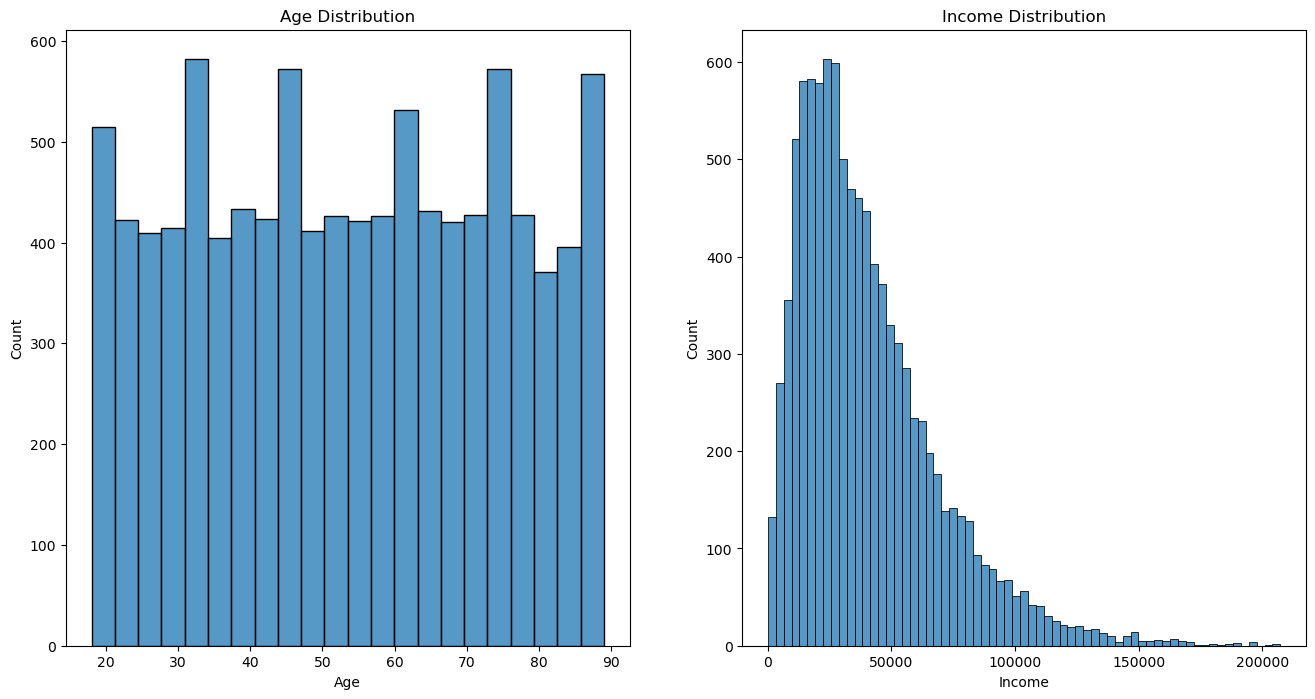

In [29]:
#Import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#Import package to ignore warning produced by visualization output
import warnings
warnings.filterwarnings('ignore')

#Set figures
fig, ax = plt.subplots(1, 2, figsize=(16,8))

#Histogram for Age distribution
sns.histplot(data=df, x='Age', ax=ax[0])
ax[0].set_title('Age Distribution')

#Histogram for Income distribution
sns.histplot(data=df, x='Income', ax=ax[1])
ax[1].set_title('Income Distribution');

<br>

The `Age` distribution looks to close to a uniform distribution. The `Income` distribution is right-skewed, with relatively few values beyond 150,000.
<br>

#### Two Categorical Variables: `Marital` & `Initial_admin`

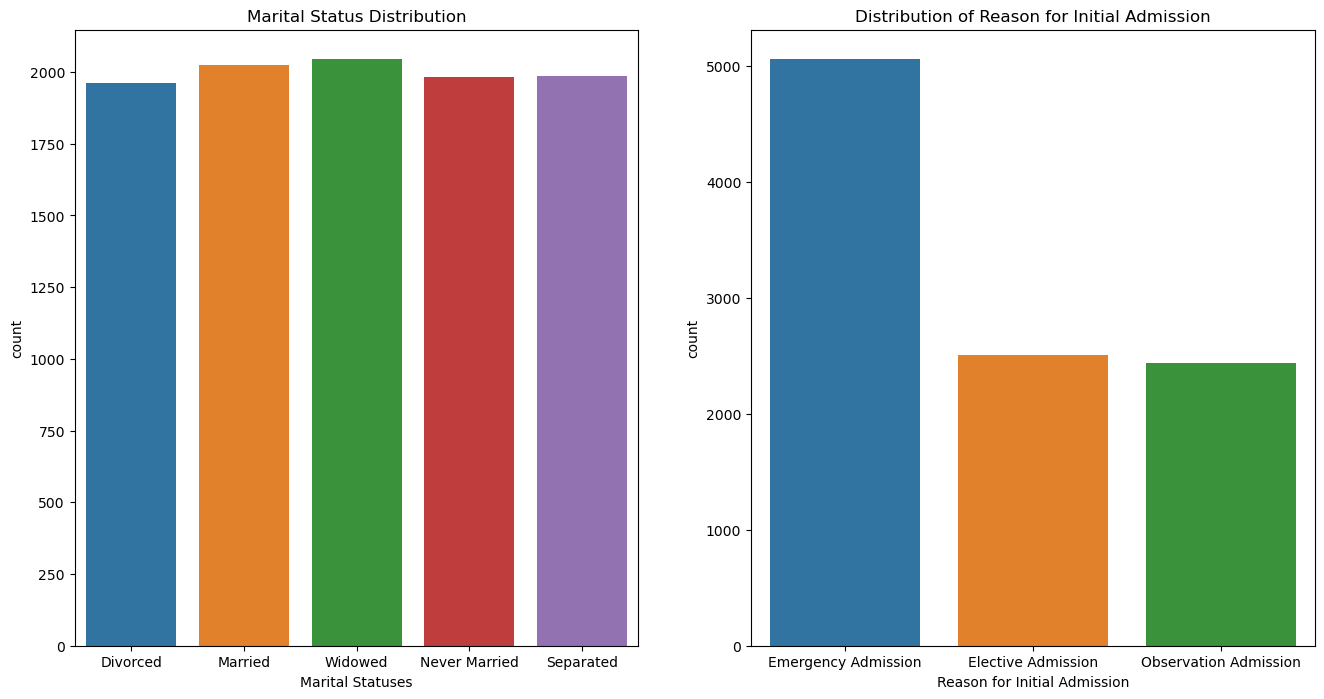

In [32]:
#Set figures
fig, ax = plt.subplots(1, 2, figsize=(16,8))

#Counts of categories for marital statuses
sns.countplot(data=df, x='Marital', ax=ax[0])
ax[0].set_title('Marital Status Distribution')
ax[0].set_xlabel('Marital Statuses')

#Counts of categories for initial admissions
sns.countplot(data=df, x='Initial_admin', ax=ax[1])
ax[1].set_title('Distribution of Reason for Initial Admission')
ax[1].set_xlabel('Reason for Initial Admission');

<br>

Visually, it can be seen that there is a uniform distribution for the `Marital` variable.

For `Initial_admin`, over half of the hospital admissions were due to emergencies, followed by elective and observational admissions at similar levels.
<br>
<br>

## D. Bivariate Statistics

#### Two Continuous Variables: `Age` & `Income`

In [36]:
df[['Age','Income']].describe()

,Age,Income
count,10000.000000,10000.000000
mean,53.511700,40490.495160
std,20.638538,28521.153293
min,18.000000,154.080000
25%,36.000000,19598.775000
50%,53.000000,33768.420000
75%,71.000000,54296.402500
max,89.000000,207249.100000


In [37]:
df[['Age','Income']].corr()

,Age,Income
Age,1.000000,-0.012228
Income,-0.012228,1.000000


With a value very close to zero, this is a very weak correlation between `Age` and `Income`. Although weak, since the correlation value is negative this would indicate that income decreases as age increases.
<br>

#### Two Categorical Variables: `Marital` & `Initial_admin`

In [40]:
pd.crosstab(df.Marital, df.Initial_admin, margins=True)

Initial_admin,Elective Admission,Emergency Admission,Observation Admission,All
Marital,,,,
Divorced,492,986,483,1961
Married,499,1051,473,2023
Never Married,528,973,483,1984
Separated,499,998,490,1987
Widowed,486,1052,507,2045
All,2504,5060,2436,10000


In [41]:
pd.crosstab(df.Marital, df.Initial_admin).describe()

Initial_admin,Elective Admission,Emergency Admission,Observation Admission
count,5.000000,5.000000,5.000000
mean,500.800000,1012.000000,487.200000
std,16.146207,37.128156,12.617448
min,486.000000,973.000000,473.000000
25%,492.000000,986.000000,483.000000
50%,499.000000,998.000000,483.000000
75%,499.000000,1051.000000,490.000000
max,528.000000,1052.000000,507.000000


In [42]:
df.loc[:,['Marital','Initial_admin']].value_counts()

Marital        Initial_admin        
Widowed        Emergency Admission      1052
Married        Emergency Admission      1051
Separated      Emergency Admission       998
Divorced       Emergency Admission       986
Never Married  Emergency Admission       973
               Elective Admission        528
Widowed        Observation Admission     507
Married        Elective Admission        499
Separated      Elective Admission        499
Divorced       Elective Admission        492
Separated      Observation Admission     490
Widowed        Elective Admission        486
Divorced       Observation Admission     483
Never Married  Observation Admission     483
Married        Observation Admission     473
Name: count, dtype: int64

It can be seen that for each admission type, the frequency of each marital status is very close to one another. For marital status by elective admission the minimum and maximum are 486 and 528 with a mean and median of 500.8 and 499, respectively. For marital status by emergency admission the minimum and maximum are 973 and 1052 with a mean and median of 1012 and 998, respectively. For marital status by observational admission the minimum and maximum are 473 and 507 with a mean and median of 487.2 and 483, respectively. The range for marital statuses by elective admissions is 42, emergency admissions are 79, and observation admissions is 34. Because the ranges are so small, this indicates that for each admission type, it is equally likely that the patient is of one of the marital statuses. Additionally, widowed patients who were admitted for emergencies were the most common, whereas married patients who were admitted for observation were the least common.
<br>

## D1. Visual of Findings

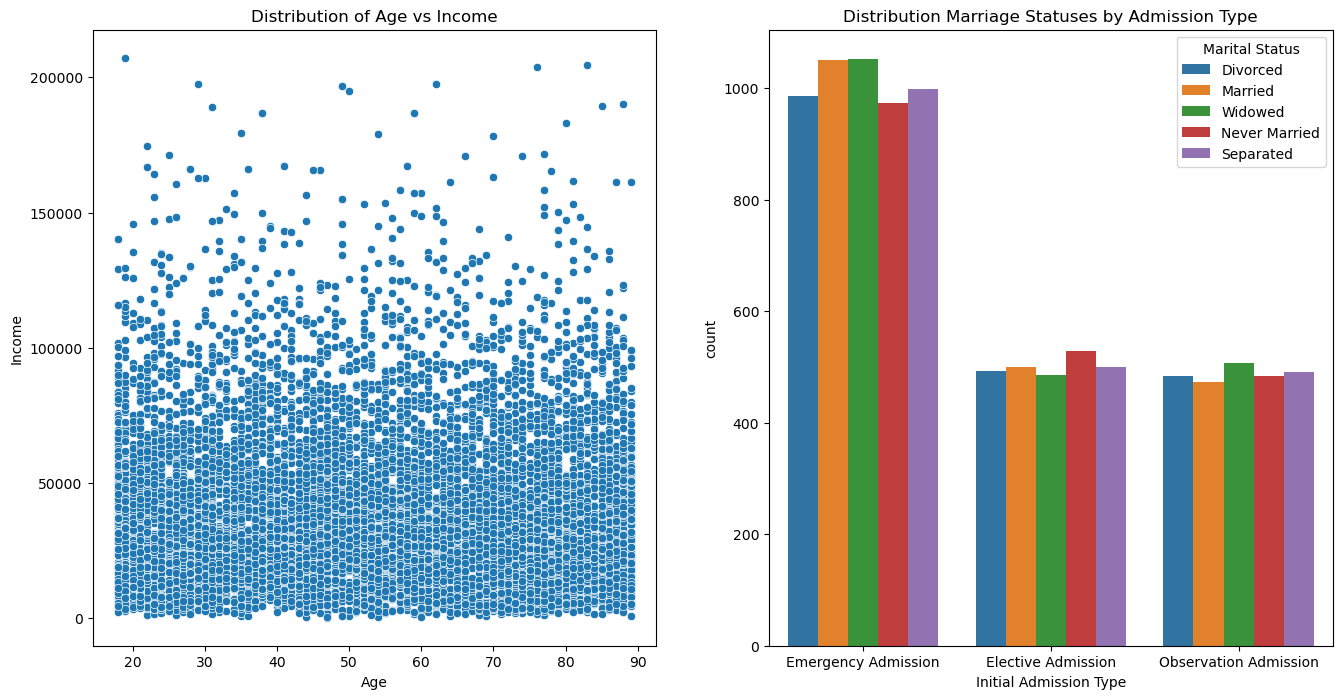

In [46]:
#Set figures
fig, ax = plt.subplots(1, 2, figsize=(16,8))

#Scatterplot of Age vs Income
sns.scatterplot(data=df, x='Age', y='Income', ax=ax[0])
ax[0].set_title('Distribution of Age vs Income')
#ax[0].set_xlabel('Marital Statuses')

#Counts of marital statuses grouped by initial admission type
sns.countplot(data=df, x='Initial_admin', hue='Marital', ax=ax[1])
ax[1].set_title('Distribution Marriage Statuses by Admission Type')
ax[1].set_xlabel('Initial Admission Type')
ax[1].legend(title='Marital Status');

When visually looking at the scatterplot of `Income` by `Age`, there is no discernable relationship as income levels vary widely at every age.

Visually, it can be seen that marital statuses are uniformly distributed for each admission type. Emergency admissions were most prevalent, whereas elective and observational admissions were of similar frequencies.
<br>
<br>

## E1. Results of Analysis

The hypothesis test was performed using $\alpha=0.05$ using the Chi-Square Test of Independence to find if there was a relationship among the interested variables. The Chi-Square Test of Independence gave a result of $\chi^{2}(1)=0.70,p=0.40$.

The research of interest looked at whether patients who were overweight had a significant impact on their hospital readmissions. The null hypothesis stated that an overweight condition and hospital readmission were independent. The alternate hypothesis stated that an overweight condition and hospital readmissions were not independent. Since the p-value returned was more significant than the alpha set, this would indicate that we failed to reject the null hypothesis. In context, it would be stated that, with 95% certainty, since the interested variables are independent of each other, the presence of an overweight condition had no significant bearing on hospital readmissions and that patients who are readmitted occur at the same rate as those who are not overweight.
<br><br>

## E2. Limitations of Analysis

One of the more prevalent limitations of utilizing the Chi-Square Test of Independence is that it only looks at whether two categorical variables are independent. Alternatively speaking, it looks at whether two variables are correlated. The limitation is that even if a correlation result was found, this does not immediately conclude causality (The Chi-Square Test for Independence, n.d.). Another limitation includes the confounding variables not included in this study, which may alter analysis results. Lastly, another issue is the inability to assess the data quality due to the lack of communication with the provider. Analytical results may drastically change how hospitals decide to treat patients, altering patient outcomes. Thus, it is pertinent that the data comes from a reliable source and is error-free.
<br><br>

## E3. Recommended Course of Action

Because the null hypothesis could not be rejected, it indicates that overweight is independent of hospital readmissions. There is little course of action to take concerning this result. Additionally, as this preliminary study looked at only a couple of variables, it is recommended that further analysis be performed. Specifically, other studies could look at different or even a combination of conditions available in the dataset to see whether they affect hospital readmissions. Such deeper analyses would allow stakeholders to be better informed in their decision-making process.
<br><br>

## F. Video

The video demonstrating the code was submitted and can also be found at: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=05c2b42c-33b1-45e6-9c42-b1b7015234b5
<br><br>

## G. Sources for Third-Party Code

_Python for Data Science_. Chi-square Test of Independence. (n.d.). https://www.pythonfordatascience.org/chi-square-test-of-independence-python/#:~:text=The%20test%20of%20independence%20tests,will%20need%20to%20be%20conducted 

## H. Sources

Jones, L., Bylander, A., & Islam, M. (2019, October 3). _Obesity in the U.S_. Food Research & Action Center. https://frac.org/obesity-health/obesity-u-s-2#:~:text=The%20latest%20data%20indicate%20that,tend%20to%20increase%20with%20age.

_The Chi-Square Test for Independence_. Chi-Square - Sociology 3112 - Department of Sociology - The University of utah. (n.d.). https://soc.utah.edu/sociology3112/chi-square.php 